# $k$-NN

A first attempt at implementing the $k$ nearest neighbours algorithm.

In [55]:
## Note that this seems to work as expected when all
## predictors continuous. Should be able to change metric
## and get reasonable results for all categorical.
## How it behaves on mix of continuous and categorical
## predictors is to be seen but it seems clear it will be
## heavily dependent on the amount of variation present
## in the continuous 

import numpy as np

class knn_classifier():

    def __init__(self, k):

        # make the object
        # should I be considering more than this?
        self.k = k
        self.X_train = None
        self.y_train = None


    def fit(self, y, X):

        # should basically just be loading?
        # there really isn't anything going on at this stage
        self.X_train = X
        self.y_train = y


    def predict(self, X):

        # generate empty array to hold predictions dim: n x 1 array
        prediction = np.zeros(X.shape[0])

        # loop over all observations (rows) in test set
        for i in range(X.shape[0]):

            # row-wise computation of vector norm of difference between
            # current obs. and all training obs. will be an n x 1 array
            distance = np.linalg.norm(self.X_train - X[i,], axis = 1)

            # keep the labels of closest k obs. from training set
            close_k = self.y_train[np.argsort(distance)][:self.k]

            # find the mode of closest obs. labels
            values, counts = np.unique(close_k, return_counts=True)

            # insert our prediction for ith obs. into ith position of prediciton
            prediction[i] = values[np.argmax(counts)]

        return prediction.astype(int) ## we are classifying

   

<function matplotlib.pyplot.show>

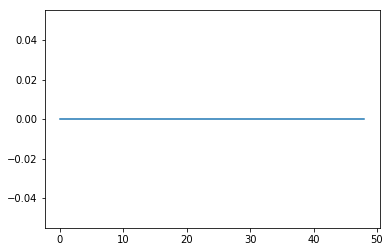

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_total, y_total = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

out = []

for k in range(1, 50):
    
    sklearn_knn = KNeighborsClassifier(n_neighbors=k)
    sklearn_knn.fit(X_train, y_train)
    skp = sklearn_knn.predict(X_test)

    my_knn = knn_classifier(k=k)
    my_knn.fit(y=y_train, X=X_train)
    mp = my_knn.predict(X_test)

    out.append(np.count_nonzero(skp-mp))
    
plt.plot(out)
plt.show

So we are seeing no difference between my implementation an `sklearn`'s version for $k$ between 1 and 50 on the iris dataset. This is encouraging, but far from conclusive evidence that I have done a good job. Lets look at the digits dataset that we used in the first lab of Supervised Learning 1.

<function matplotlib.pyplot.show>

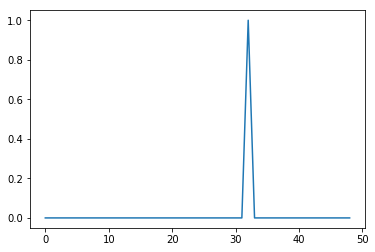

In [59]:
X_total, y_total = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

out = []

for k in range(1, 50):
    
    sklearn_knn = KNeighborsClassifier(n_neighbors=k)
    sklearn_knn.fit(X_train, y_train)
    skp = sklearn_knn.predict(X_test)

    my_knn = knn_classifier(k=k)
    my_knn.fit(y=y_train, X=X_train)
    mp = my_knn.predict(X_test)

    out.append(np.count_nonzero(skp-mp))
    
plt.plot(out)
plt.show

In [60]:
np.asarray(out).argsort()[-1]

32

Okay, so we are seeing that my implementation differs from `sklearn`'s on the digits dataset. Lets look into this discrepancy:

In [61]:
sklearn_knn = KNeighborsClassifier(n_neighbors=33)
sklearn_knn.fit(X_train, y_train)
skp = sklearn_knn.predict(X_test)

my_knn = knn_classifier(k=33)
my_knn.fit(y=y_train, X=X_train)
mp = my_knn.predict(X_test)

print(skp[(skp-mp).argsort()[-1]])
print(mp[(skp-mp).argsort()[-1]])

8
2


So `sklearn` thinks this is an 8. My classifier thinks it is a 2. Which is it?

In [62]:
y_test[(skp-mp).argsort()[-1]]

2

Wow. Mine is actually right and `sklearn` is wrong. Wild.

The investigations thus far have been fun but have not been testing the areas where problems are likely to arise: namely when we mix catgorical and continuous variables. 